# Banana Navigation

---
This is the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

this code is implemented on Window 10.

In [1]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
import numpy as np
import random
import torch
import pickle
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="unity/Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. define the DQN

dqn execute DQN algorithm according to agent mode. you can choose one from `vanilla`, `double`, `prioritized`, `dueling`, `rainbow`.

In [5]:
def dqn(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)     # select an action
            #np.int64 raise error AttributeError: 'numpy.int64' object has no attribute 'keys'
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

### 4. train agent

In [6]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="vanilla")
vanilla_scores = dqn(agent)

with open('saved_scores/vanilla_scores.txt', 'wb') as f:
    pickle.dump(vanilla_scores, f)
agent.save()

Episode 100	Average Score: 1.26
Episode 200	Average Score: 4.02
Episode 300	Average Score: 7.62
Episode 400	Average Score: 10.07
Episode 500	Average Score: 12.28
Episode 600	Average Score: 13.76
Episode 700	Average Score: 14.73
Episode 800	Average Score: 14.24
Episode 900	Average Score: 14.57
Episode 1000	Average Score: 14.00
Episode 1100	Average Score: 15.39
Episode 1200	Average Score: 15.77
Episode 1300	Average Score: 15.62
Episode 1400	Average Score: 15.36
Episode 1500	Average Score: 15.13
Episode 1600	Average Score: 15.34
Episode 1700	Average Score: 16.49
Episode 1800	Average Score: 15.81
Episode 1900	Average Score: 15.31
Episode 2000	Average Score: 14.74


In [7]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="double")
double_scores = dqn(agent)

with open('saved_scores/double_scores.txt', 'wb') as f:
    pickle.dump(double_scores, f)
agent.save()

Episode 100	Average Score: 0.24
Episode 200	Average Score: 1.84
Episode 300	Average Score: 6.77
Episode 400	Average Score: 10.03
Episode 500	Average Score: 11.53
Episode 600	Average Score: 13.84
Episode 700	Average Score: 15.05
Episode 800	Average Score: 16.01
Episode 900	Average Score: 15.74
Episode 1000	Average Score: 16.60
Episode 1100	Average Score: 16.42
Episode 1200	Average Score: 16.15
Episode 1300	Average Score: 15.88
Episode 1400	Average Score: 16.45
Episode 1500	Average Score: 17.02
Episode 1600	Average Score: 16.45
Episode 1700	Average Score: 16.76
Episode 1800	Average Score: 16.19
Episode 1900	Average Score: 16.92
Episode 2000	Average Score: 16.72


In [9]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="prioritized")
prioritized_scores = dqn(agent)

with open('saved_scores/prioritized_scores.txt', 'wb') as f:
    pickle.dump(prioritized_scores, f)
agent.save()

Episode 100	Average Score: 0.73
Episode 200	Average Score: 3.15
Episode 300	Average Score: 5.88
Episode 400	Average Score: 6.70
Episode 500	Average Score: 7.29
Episode 600	Average Score: 8.63
Episode 700	Average Score: 8.48
Episode 800	Average Score: 8.91
Episode 900	Average Score: 8.89
Episode 1000	Average Score: 9.42
Episode 1100	Average Score: 8.88
Episode 1200	Average Score: 9.48
Episode 1300	Average Score: 9.16
Episode 1400	Average Score: 8.63
Episode 1500	Average Score: 7.92
Episode 1600	Average Score: 8.75
Episode 1700	Average Score: 8.01
Episode 1800	Average Score: 7.60
Episode 1900	Average Score: 7.73
Episode 2000	Average Score: 7.92


In [10]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="dueling")
dueling_scores = dqn(agent)

with open('saved_scores/dueling_scores.txt', 'wb') as f:
    pickle.dump(dueling_scores, f)
agent.save()

Episode 100	Average Score: 0.58
Episode 200	Average Score: 3.04
Episode 300	Average Score: 7.19
Episode 400	Average Score: 9.28
Episode 500	Average Score: 12.27
Episode 600	Average Score: 14.38
Episode 700	Average Score: 15.24
Episode 800	Average Score: 14.89
Episode 900	Average Score: 13.96
Episode 1000	Average Score: 15.24
Episode 1100	Average Score: 15.96
Episode 1200	Average Score: 14.92
Episode 1300	Average Score: 16.19
Episode 1400	Average Score: 16.09
Episode 1500	Average Score: 16.13
Episode 1600	Average Score: 16.55
Episode 1700	Average Score: 14.68
Episode 1800	Average Score: 15.46
Episode 1900	Average Score: 15.27
Episode 2000	Average Score: 14.61


In [11]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="rainbow")
rainbow_scores = dqn(agent)

with open('saved_scores/rainbow_scores.txt', 'wb') as f:
    pickle.dump(rainbow_scores, f)
agent.save()

Episode 100	Average Score: 0.41
Episode 200	Average Score: 2.74
Episode 300	Average Score: 6.42
Episode 400	Average Score: 8.36
Episode 500	Average Score: 11.39
Episode 600	Average Score: 12.35
Episode 700	Average Score: 12.94
Episode 800	Average Score: 12.55
Episode 900	Average Score: 13.41
Episode 1000	Average Score: 13.54
Episode 1100	Average Score: 14.17
Episode 1200	Average Score: 13.32
Episode 1300	Average Score: 12.78
Episode 1400	Average Score: 13.97
Episode 1500	Average Score: 14.69
Episode 1600	Average Score: 14.56
Episode 1700	Average Score: 14.18
Episode 1800	Average Score: 13.71
Episode 1900	Average Score: 13.14
Episode 2000	Average Score: 13.56


### 5. Test model

In [4]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="double")
agent.load()

In [6]:
n_episodes = 3
max_t = 1000
eps = 0 #In test, eps set to zero
scores = []
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    for t in range(max_t):
        action = agent.act(state, eps).astype(int)     # select an action
        #np.int64 raise error AttributeError: 'numpy.int64' object has no attribute 'keys'
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores.append(score)              # save most recent score
print(scores)

KeyboardInterrupt: 

### 6. close the environment.

In [18]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.

### 6. Comparison

Comparison with rolling mean is better than raw score.

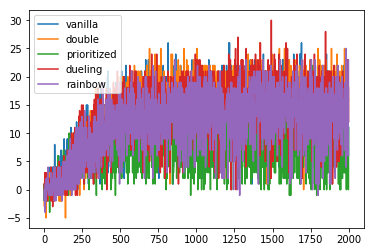

In [19]:
vanilla, = plt.plot(vanilla_scores, label='vanilla')
double, = plt.plot(double_scores, label='double')
prioritized, = plt.plot(prioritized_scores, label='prioritized')
dueling, = plt.plot(dueling_scores, label='dueling')
rainbow, = plt.plot(rainbow_scores, label='rainbow')
plt.legend(handles=[vanilla, double, prioritized, dueling, rainbow])
plt.show()

In [20]:
def rolling_mean(scores):
    rolling_mean = []
    scores_window = deque(maxlen=100)
    for i in range(len(scores)):
        scores_window.append(scores[i])
        rolling_mean.append(np.mean(scores_window))
    return rolling_mean
vanila_rolling_mean = rolling_mean(vanilla_scores)
double_rolling_mean = rolling_mean(double_scores)
prioritized_rolling_mean = rolling_mean(prioritized_scores)
dueling_rolling_mean = rolling_mean(dueling_scores)
rainbow_rolling_mean = rolling_mean(rainbow_scores)

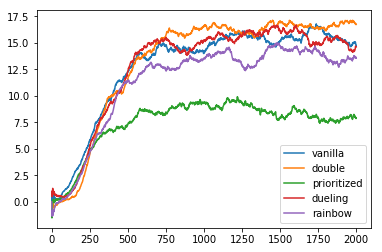

In [21]:
vanilla, = plt.plot(vanila_rolling_mean, label='vanilla')
double, = plt.plot(double_rolling_mean, label='double')
prioritized, = plt.plot(prioritized_rolling_mean, label='prioritized')
dueling, = plt.plot(dueling_rolling_mean, label='dueling')
rainbow, = plt.plot(rainbow_rolling_mean, label='rainbow')
plt.legend(handles=[vanilla, double, prioritized, dueling, rainbow])
plt.show()